<a id = '0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#78ccdb ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Table of Contents</h2> 


*  [1. Introduction](#1.0)
*  [2. importing libraries](#2.0)
*  [3. Data visualization](#3.0)
*  [4. Classification with Vanila CNN](#4.0)
*  [5. Data agumentaion, learning rate schedule, and Early stoping](#5.0)
*  [6. Classification with ResNet](#6.0)
*  [7. Final predictions on Test Set](#7.0)
*  [8. Summary](#8.0)


# 1.0 Convolutional Neural Network (CNN)

A **Convolutional Neural Network (ConvNet/CNN)** is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#78ccdb ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" > importing libraries </h2> 

In [1]:
import numpy as np
import sys
import tensorflow as tf
import os
import sys
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# basic librareis
import zipfile
import glob
import os
import pandas as pd
import numpy as np
from PIL import Image


# plotting and visualizations
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import missingno as msno
%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px

In [2]:
import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [3]:
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25000 number of images in directory.


In [4]:
IMAGE_FOLDER_PATH = "../working/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)

In [5]:
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [6]:
dataset.head()

,image_path,target
0,../working/train/dog.1853.jpg,dog
1,../working/train/dog.8986.jpg,dog
2,../working/train/dog.11444.jpg,dog
3,../working/train/cat.11908.jpg,cat
4,../working/train/cat.779.jpg,cat


In [7]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25000
dog    12500
cat    12500
Name: target, dtype: int64


In [8]:
fig=px.pie(counts.head(10),values= 'target', names=dataset['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

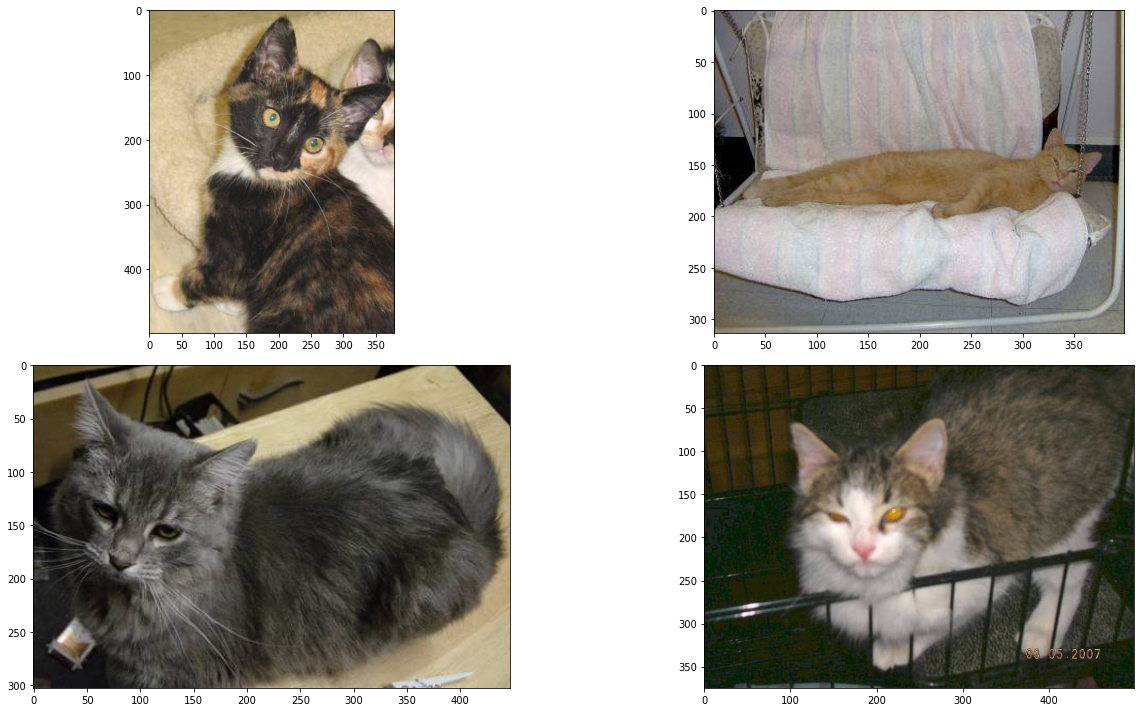

In [9]:
rows = 2
cols = 2
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

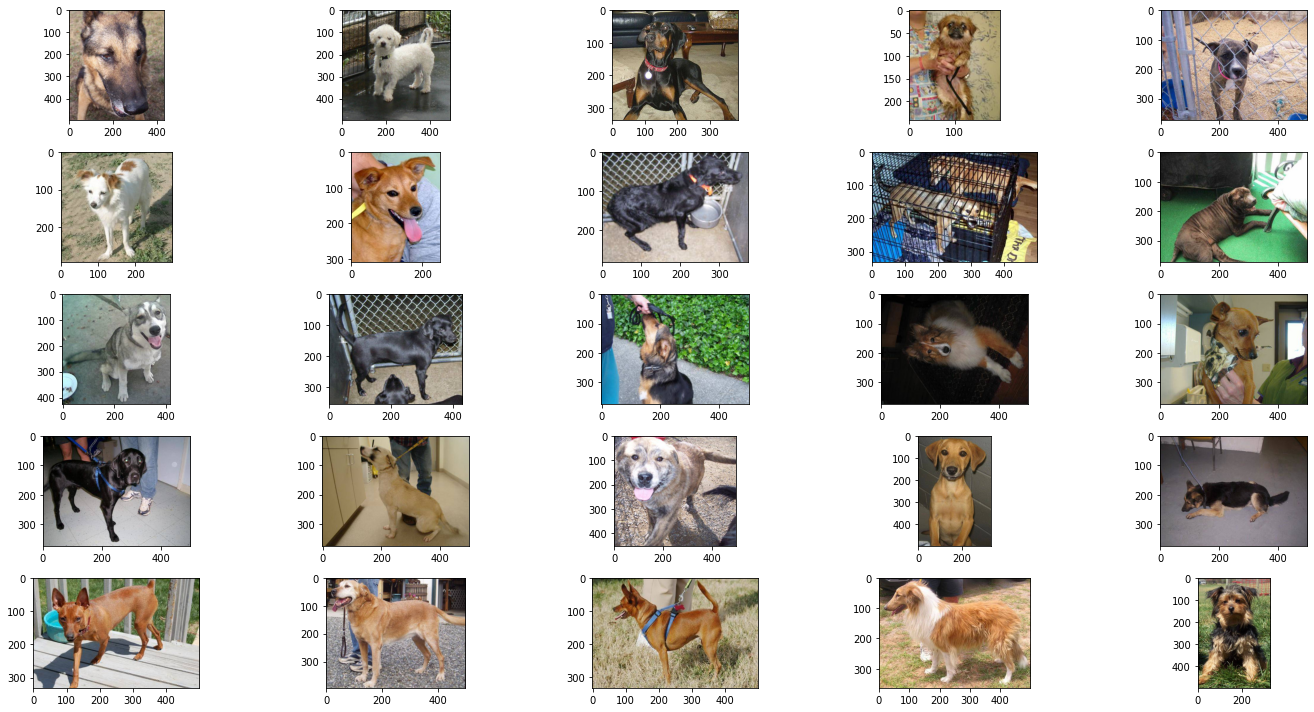

In [10]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

In [11]:
train, test_val = train_test_split(dataset, test_size=0.2, stratify=dataset['target'], random_state=20)
test, val = train_test_split(test_val, test_size=0.5,  stratify=test_val['target'], random_state=20)

In [12]:
train.shape, test_val.shape


((20000, 2), (5000, 2))

In [13]:
target_distribution =test['target'].value_counts()
target_distribution.head(10)

cat    1250
dog    1250
Name: target, dtype: int64

In [14]:
print('train set distribution:\n',train['target'].value_counts())
print('\nvalid set distribution:\n',test['target'].value_counts())
print()

plt.figure(figsize=(10,5))
fig=px.pie(target_distribution.head(10),values= 'target', names=train['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

fig=px.pie(target_distribution.head(10),values= 'target', names=test['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()


train set distribution:
 dog    10000
cat    10000
Name: target, dtype: int64

valid set distribution:
 cat    1250
dog    1250
Name: target, dtype: int64



<Figure size 720x360 with 0 Axes>

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [16]:
FILTER_SIZE = 3
NUM_FILTERS = 32
INPUT_SIZE = 32
MAXPOOL_SIZE = 2
BATCH_SIZE = 16
STEPS_PER_EPOCH = 20000//BATCH_SIZE
EPOCHS = 15

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (INPUT_SIZE,INPUT_SIZE,3),kernel_regularizer=tf.keras.regularizers.l2(0.01), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE,MAXPOOL_SIZE)))

model.add(Conv2D(32,(3,3), input_shape = (INPUT_SIZE,INPUT_SIZE,3),kernel_regularizer=tf.keras.regularizers.l2(0.01), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE,MAXPOOL_SIZE)))


model.add(Flatten())
model.add(Dense(units=128,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

aug_gen = ImageDataGenerator(rescale = 1./255)
                               
                             
training_set = aug_gen.flow_from_dataframe(train, x_col="image_path",
                                                     y_col="target",target_size = (32,32),
                                                          batch_size = 16,class_mode='binary')
# Preprocessing the Test set
test_data_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_data_generator.flow_from_dataframe(test,x_col="image_path",
                                                     y_col="target",target_size = (32, 32),
                                            batch_size = 16,
                                            class_mode = 'binary')
                                           
model.summary()


Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=5, monitor='val_loss', min_lr=0.00001)
checkpoint_cb = ModelCheckpoint('model.h5', save_best_only=True)

callbacks = [earlystop_cb, reduce_lr_cb, checkpoint_cb]

In [19]:
r=model.fit(x=training_set,validation_data =test_set,steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose = 1,callbacks=callbacks)

Epoch 1/15
1250/1250 [==============================] - 63s 45ms/step - loss: 0.7064 - accuracy: 0.5756 - val_loss: 0.6612 - val_accuracy: 0.6192
Epoch 2/15
1250/1250 [==============================] - 56s 45ms/step - loss: 0.6407 - accuracy: 0.6510 - val_loss: 0.6327 - val_accuracy: 0.6532
Epoch 3/15
1250/1250 [==============================] - 57s 45ms/step - loss: 0.6199 - accuracy: 0.6736 - val_loss: 0.6263 - val_accuracy: 0.6628
Epoch 4/15
1250/1250 [==============================] - 57s 45ms/step - loss: 0.6052 - accuracy: 0.6895 - val_loss: 0.6129 - val_accuracy: 0.6788
Epoch 5/15
1250/1250 [==============================] - 56s 45ms/step - loss: 0.5969 - accuracy: 0.6970 - val_loss: 0.6038 - val_accuracy: 0.6988
Epoch 6/15
1250/1250 [==============================] - 57s 45ms/step - loss: 0.5843 - accuracy: 0.7103 - val_loss: 0.5825 - val_accuracy: 0.7068
Epoch 7/15
1250/1250 [==============================] - 57s 45ms/step - loss: 0.5750 - accuracy: 0.7161 - val_loss: 0.5858 -

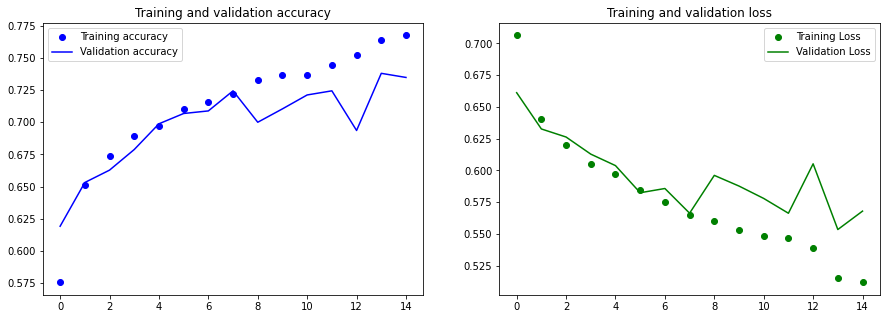

In [20]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**using SVM**

In [21]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_dataframe(train, x_col="image_path",
                                                     y_col="target",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_dataframe(test, x_col="image_path",
                                                     y_col="target",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))
cnn.summary()

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0       

In [22]:
 #Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
625/625 [==============================] - 76s 120ms/step - loss: 0.8388 - accuracy: 0.5971 - val_loss: 0.6709 - val_accuracy: 0.6984
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.6585 - accuracy: 0.6950 - val_loss: 0.6236 - val_accuracy: 0.7424
Epoch 3/10
625/625 [==============================] - 75s 121ms/step - loss: 0.5947 - accuracy: 0.7215 - val_loss: 0.5536 - val_accuracy: 0.7412
Epoch 4/10
625/625 [==============================] - 75s 121ms/step - loss: 0.5424 - accuracy: 0.7481 - val_loss: 0.5371 - val_accuracy: 0.7860
Epoch 5/10
625/625 [==============================] - 75s 121ms/step - loss: 0.5014 - accuracy: 0.7683 - val_loss: 0.4804 - val_accuracy: 0.8072
Epoch 6/10
625/625 [==============================] - 75s 120ms/step - loss: 0.4703 - accuracy: 0.7854 - val_loss: 0.4640 - val_accuracy: 0.8064
Epoch 7/10
625/625 [==============================] - 76s 121ms/step - loss: 0.4584 - accuracy: 0.7897 - val_loss: 0.4703 - val_ac

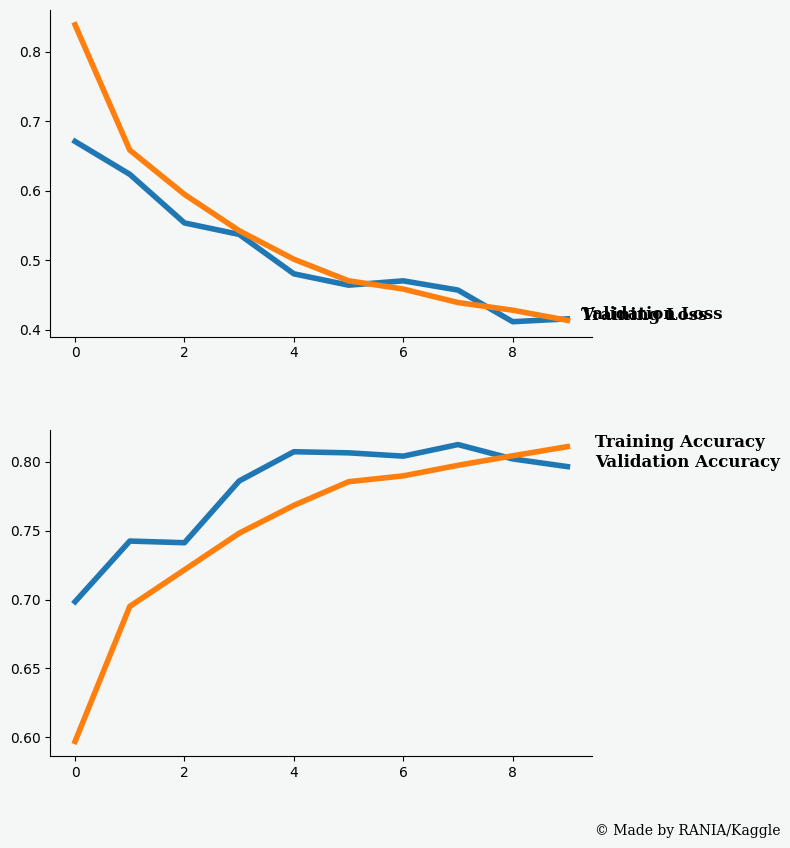

In [23]:
import seaborn as sns
fig,ax  = plt.subplots(2,1, figsize =(8,8), dpi = 100)
fig.patch.set_facecolor('#f5f6f6')

axes  = ax.ravel()

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['right','top',]:
        ax.spines[loc].set_visible(False)
        
hist1 = r.history
Epochs =  range(len(hist1['loss']))

## loss plot
sns.lineplot(x = Epochs, y = hist1['val_loss'],  ax = axes[0], linewidth = 4)
sns.lineplot(x = Epochs, y = hist1['loss'], ax  = axes[0], linewidth =4)


axes[0].text(Epochs[-1]+0.25,hist1['val_loss'][-1],'Validation Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':"black"})
axes[0].text(Epochs[-1]+0.25,hist1['loss'][-1] ,'Training Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':"black"})


# accuracy plot
sns.lineplot(x = Epochs, y = hist1['val_accuracy'],ax = axes[1],linewidth = 4)
sns.lineplot(x = Epochs, y = hist1['accuracy'],ax = axes[1],linewidth =4)
axes[1].text(Epochs[-1]+0.50,hist1['val_accuracy'][-1],'Validation Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':"black"})
axes[1].text(Epochs[-1]+0.50,hist1['accuracy'][-1] ,'Training Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold','color':"black"})



        
fig.text(0.75,-0.05,'© Made by RANIA/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.tight_layout(h_pad = 5)